In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cut_tree
from scipy.spatial.distance import pdist

## Digits

In [3]:
from sklearn.datasets import load_digits
digits = load_digits()

In [34]:
from sklearn.metrics import silhouette_score
digits_km_sil = np.empty(29)
digits_gmm_sil = np.empty(29)
digits_hac_sil = np.empty(29)
for i in range(2,31):
    km = KMeans(n_clusters=i)
    digits_km = km.fit(digits.data)
    digits_km_sil[i-2] = silhouette_score(digits.data, digits_km.labels_)
    gmm = GaussianMixture(n_components=i)
    digits_gmm = gmm.fit(digits.data)
    digits_gmm_sil[i-2] = silhouette_score(digits.data, digits_gmm.predict(digits.data))
    digits_hac = linkage(digits.data, "average")
    digits_average = cut_tree(digits_hac, n_clusters=i)
    digits_hac_sil[i-2] = silhouette_score(digits.data, np.transpose(digits_average)[0])

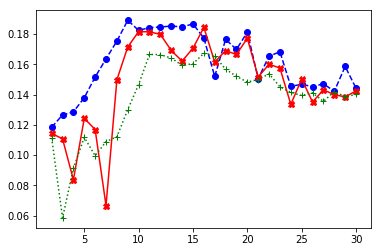

In [37]:
plt.plot(range(2,31), digits_km_sil, 'b-', marker='o', linestyle='dashed')
plt.plot(range(2,31), digits_gmm_sil, 'r-', marker='X')
plt.plot(range(2,31), digits_hac_sil, 'g-', marker='+', linestyle=':')
plt.show()

## 20Newsgroup

In [38]:
from sklearn.datasets import twenty_newsgroups
ng20 = twenty_newsgroups.fetch_20newsgroups(subset='train', categories=['rec.sport.baseball', 'comp.graphics', 'comp.windows.x'], remove=['headers','footers','quotes'])
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(stop_words='english', max_df=0.95)
ng20_occur = count_vect.fit_transform(ng20.data)
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer(use_idf=True).fit(ng20_occur)
ng20_tfidf = tf_transformer.transform(ng20_occur)

In [40]:
ng20_km_sil = np.empty(9)
for i in range(2,11):
    km = KMeans(n_clusters=i)
    ng20_km = km.fit(ng20_tfidf)
    ng20_km_sil[i-2] = silhouette_score(ng20_tfidf, ng20_km.labels_)

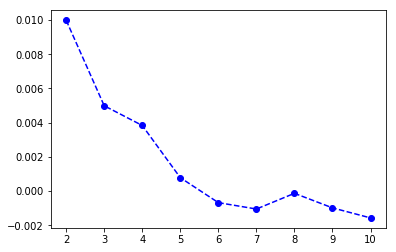

In [41]:
plt.plot(range(2,11), ng20_km_sil, 'b-', marker='o', linestyle='dashed')